In [1]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

def uniformAssignment(config, num_of_robots=2):
    """ The resource allocation is done equally to all contributors so that all robots utilizes all resources equally.

    Args:
        config (_type_): the information about the constraints and hyperparameters of the problem
        num_of_robots (int, optional): The number of robots. Defaults to 2.

    Returns:
        rates: the decided offloading rates of the robots
        objective_value: the utility of the robots after the allocation
    """
    # The constraint donating the cloud's limited computation capability or network bandwith
    R = config['cloud_resource']
    # The deadlines of different robots
    Tau = config['task_deadlines']
    # The elasticity of the accuracy variable in the utility formulation
    gamma = config['accuracy_elasticity']
    # The elasticity of the hardness variable in the utility formulation
    beta = config['hardness_elasticity']
    # The accuracy of the robot's local model
    alpha_r = config['robot_accuracy']
    # The accuracy of the cloud model
    alpha_c = config['cloud_accuracy']
    # The hardness level of the robot's operation environment
    Omega = config['hardness_levels']
    tau_sum = np.sum(Tau)
    rates = np.ones((num_of_robots,1))*R/tau_sum
    rates[rates>=1]=1
    objective_value = - np.sum(np.multiply(np.power((alpha_c - alpha_r)*rates+alpha_r,gamma) , np.power(Omega,beta)))
    print(rates)
    print(-1*objective_value)
    return rates, objective_value


def randomAssignment(config, num_of_robots=2):
    """The resource allocation is done probabilistically to all contributors so that all robots utilizes all resources randomly.

    Args:
        config (_type_): the information about the constraints and hyperparameters of the problem
        num_of_robots (int, optional): The number of robots. Defaults to 2.

    Returns:
        rates: the decided offloading rates of the robots
        objective_value: the utility of the robots after the allocation
    """
    # The constraint donating the cloud's limited computation capability or network bandwith
    R = config['cloud_resource']
    # The deadlines of different robots
    Tau = config['task_deadlines']
    # The elasticity of the accuracy variable in the utility formulation
    gamma = config['accuracy_elasticity']
    # The elasticity of the hardness variable in the utility formulation
    beta = config['hardness_elasticity']
    # The accuracy of the robot's local model
    alpha_r = config['robot_accuracy']
    # The accuracy of the cloud model
    alpha_c = config['cloud_accuracy']
    # The hardness level of the robot's operation environment
    Omega = config['hardness_levels']
    rates = np.ones((num_of_robots,1))*np.random.rand(num_of_robots,1)
    while np.sum(rates*Tau)>R:
        rates = np.ones((num_of_robots,1))*np.random.rand(num_of_robots,1)
    
    objective_value = - np.sum(np.multiply(np.power((alpha_c - alpha_r)*rates+alpha_r,gamma) , np.power(Omega,beta)))
    print(rates)
    print(-1*objective_value)
    return rates, objective_value

def utilityMax(config, num_of_robots=2):
    """The resource allocation is done via the algorithm we probided in the paper to all contributors so that all robots utilizes all resources fairly.

    Args:
        config (_type_): the information about the constraints and hyperparameters of the problem
        num_of_robots (int, optional): The number of robots. Defaults to 2.

    Returns:
        rates: the decided offloading rates of the robots
        objective_value: the utility of the robots after the allocation
    """
    # The constraint donating the cloud's limited computation capability or network bandwith
    R = config['cloud_resource']
    # The deadlines of different robots
    Tau = config['task_deadlines']
    # The elasticity of the accuracy variable in the utility formulation
    gamma = config['accuracy_elasticity']
    # The elasticity of the hardness variable in the utility formulation
    beta = config['hardness_elasticity']
    # The accuracy of the robot's local model
    alpha_r = config['robot_accuracy']
    # The accuracy of the cloud model
    alpha_c = config['cloud_accuracy']
    # The hardness level of the robot's operation environment
    Omega = config['hardness_levels']
    
    # Variables 
    x_rate = cp.Variable((num_of_robots,1))
    A_mat = np.concatenate((np.transpose(Tau),-np.eye(num_of_robots),np.eye(num_of_robots)),axis=0)
    b_vec = np.concatenate((np.array([[R]]), np.zeros((num_of_robots,1)),np.ones((num_of_robots,1))), axis=0)
    # Constraints 
    constraint = [A_mat @ x_rate <= b_vec]
    # Objective
    #objective = cp.Minimize(-cp.sum(x_rate+x_init))
    #print(np.shape(x_rate+x_init))
    objective = cp.Minimize(-cp.sum(cp.multiply(cp.power(cp.multiply(alpha_c-alpha_r, x_rate)+alpha_r,gamma),cp.power(Omega,beta))))
    #objective = cp.Minimize(-cp.sum(x_init+x_rate))
    # Solve the problem
    problemm= cp.Problem(objective, constraint)
    problemm.solve()
    # Result
    print('Rates: ')
    print(x_rate.value)
    print('Total Utility: ')
    print(-1*objective.value)
    print('==================')
    return x_rate.value, objective.value

In [11]:
exp0 = {
    'cloud_resource':1000,
    'robot_accuracy':np.asarray([[0.1],[0.1]]),
    'cloud_accuracy':0.9,
    'accuracy_elasticity':0.5,
    'hardness_elasticity':0.5,
    'task_deadlines':np.asarray([[1000], [1000]]),
    'hardness_levels':np.asarray([[20],[20]])
}
exp1 = {
    'cloud_resource':1000,
    'robot_accuracy':np.asarray([[0.7],[0.1]]),
    'cloud_accuracy':0.9,
    'accuracy_elasticity':0.5,
    'hardness_elasticity':0.5,
    'task_deadlines':np.asarray([[1000], [1000]]),
    'hardness_levels':np.asarray([[20],[20]])
}
exp2 = {
    'cloud_resource':1000,
    'robot_accuracy':np.asarray([[0.1],[0.1]]),
    'cloud_accuracy':0.9,
    'accuracy_elasticity':0.5,
    'hardness_elasticity':0.5,
    'task_deadlines':np.asarray([[1000], [1000]]),
    'hardness_levels':np.asarray([[100],[10]])
}
exp3 = {
    'cloud_resource':1000,
    'robot_accuracy':np.asarray([[0.1],[0.1]]),
    'cloud_accuracy':0.9,
    'accuracy_elasticity':0.5,
    'hardness_elasticity':0.5,
    'task_deadlines':np.asarray([[500], [1500]]),
    'hardness_levels':np.asarray([[20],[20]])
}
exp4 = {
    'cloud_resource':1000,
    'robot_accuracy':np.asarray([[0.1],[0.7]]),
    'cloud_accuracy':0.9,
    'accuracy_elasticity':0.5,
    'hardness_elasticity':0.5,
    'task_deadlines':np.asarray([[1000], [1000]]),
    'hardness_levels':np.asarray([[20],[100]])
}
exp5 = {
    'cloud_resource':1000,
    'robot_accuracy':np.asarray([[0.7],[0.1]]),
    'cloud_accuracy':0.9,
    'accuracy_elasticity':0.5,
    'hardness_elasticity':0.5,
    'task_deadlines':np.asarray([[1000], [1000]]),
    'hardness_levels':np.asarray([[20],[100]])
}
exp6 = {
    'cloud_resource':1000,
    'robot_accuracy':np.asarray([[0.1],[0.7]]),
    'cloud_accuracy':0.9,
    'accuracy_elasticity':0.5,
    'hardness_elasticity':0.5,
    'task_deadlines':np.asarray([[300], [1000]]),
    'hardness_levels':np.asarray([[10],[10]])
}
exp7 = {
    'cloud_resource':200,
    'robot_accuracy':np.asarray([[0.1],[0.1]]),
    'cloud_accuracy':0.9,
    'accuracy_elasticity':0.5,
    'hardness_elasticity':0.5,
    'task_deadlines':np.asarray([[500], [1500]]),
    'hardness_levels':np.asarray([[20],[20]])
}
exp8 = {
    'cloud_resource':200,
    'robot_accuracy':np.asarray([[0.1],[0.1]]),
    'cloud_accuracy':0.9,
    'accuracy_elasticity':0.5,
    'hardness_elasticity':0.5,
    'task_deadlines':np.asarray([[500], [500]]),
    'hardness_levels':np.asarray([[20],[20]])
}
exp9 = {
    'cloud_resource':200,
    'robot_accuracy':np.asarray([[0.1],[0.1]]),
    'cloud_accuracy':0.9,
    'accuracy_elasticity':0.5,
    'hardness_elasticity':0.5,
    'task_deadlines':np.asarray([[500], [500]]),
    'hardness_levels':np.asarray([[19],[22]])
}
exp10 = {
    'cloud_resource':200,
    'robot_accuracy':np.asarray([[0.2],[0.2]]),
    'cloud_accuracy':0.9,
    'accuracy_elasticity':0.5,
    'hardness_elasticity':0.5,
    'task_deadlines':np.asarray([[500], [500]]),
    'hardness_levels':np.asarray([[20],[20]])
}
exp11 = {
    'cloud_resource':200,
    'robot_accuracy':np.asarray([[0.7],[0.1]]),
    'cloud_accuracy':0.9,
    'accuracy_elasticity':0.1,
    'hardness_elasticity':0.7,
    'task_deadlines':np.asarray([[500], [500]]),
    'hardness_levels':np.asarray([[1],[10]])
}
exp12 = {
    'cloud_resource':200,
    'robot_accuracy':np.asarray([[0.2],[0.2]]),
    'cloud_accuracy':0.9,
    'accuracy_elasticity':0.1,
    'hardness_elasticity':0.5,
    'task_deadlines':np.asarray([[500], [500]]),
    'hardness_levels':np.asarray([[1],[100]])
}
exp13 = {
    'cloud_resource':200,
    'robot_accuracy':np.asarray([[0.2],[0.2]]),
    'cloud_accuracy':0.9,
    'accuracy_elasticity':0.5,
    'hardness_elasticity':0.5,
    'task_deadlines':np.asarray([[500], [500]]),
    'hardness_levels':np.asarray([[1],[100]])
}

exps = [exp0, exp1,exp2,exp3, exp4, exp5, exp6, exp7, exp8, exp9, exp10, exp11,exp12, exp13]

::::::::::::::::::::::::::::::::::
For Convex Optimization
Rates: 
[[0.5]
 [0.5]]
Total Utility: 
6.3245553193710915
For Uniform Optimization
[[0.5]
 [0.5]]
6.324555320336759
For Random Optimization
[[0.18818787]
 [0.54392736]]
5.510046812876545
::::::::::::::::::::::::::::::::::
For Convex Optimization
Rates: 
[[2.49627887e-09]
 [9.99999995e-01]]
Total Utility: 
7.984298065230067
For Uniform Optimization
[[0.5]
 [0.5]]
7.16227766016838
For Random Optimization
[[0.12185784]
 [0.04362696]]
5.448804355175556
::::::::::::::::::::::::::::::::::
For Convex Optimization
Rates: 
[[9.99999988e-01]
 [1.14865652e-08]]
Total Utility: 
10.486832976628149
For Uniform Optimization
[[0.5]
 [0.5]]
9.307135789365265
For Random Optimization
[[0.3869532 ]
 [0.23153853]]
8.08858527185044
::::::::::::::::::::::::::::::::::
For Convex Optimization
Rates: 
[[1.        ]
 [0.33333333]]
Total Utility: 
6.950653487861306
For Uniform Optimization
[[0.5]
 [0.5]]
6.324555320336759
For Random Optimization
[[0.38464

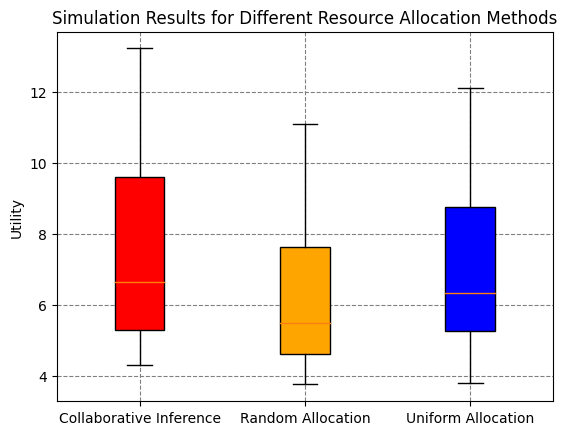

In [12]:
simUtilityConvex = []
simUtilityRandom = []
simUtilityUniform = []

for exp in exps:
    print('::::::::::::::::::::::::::::::::::')
    print('For Convex Optimization')
    actionVal, objectiveVal = utilityMax(exp)
    simUtilityConvex.append(-1*objectiveVal)
    print('=================================')
    print('For Uniform Optimization')
    actionVal, objectiveVal = uniformAssignment(exp)
    simUtilityUniform.append(-1*objectiveVal)
    print('=================================')
    print('For Random Optimization')
    actionVal, objectiveVal = randomAssignment(exp)
    simUtilityRandom.append(-1*objectiveVal)
    
simUtilityConvex = np.asarray(simUtilityConvex)
simUtilityRandom = np.asarray(simUtilityRandom)
simUtilityUniform = np.asarray(simUtilityUniform)

plt.figure()
bplot = plt.boxplot([simUtilityConvex, simUtilityRandom, simUtilityUniform],labels=['Collaborative Inference','Random Allocation','Uniform Allocation'], patch_artist=True)
#plt.boxplot([simUtilityConvex, simUtilityRandom, simUtilityUniform],labels=['Convex','Random','Uniform'], patch_artist=True)
plt.title('Simulation Results for Different Resource Allocation Methods')
plt.ylabel('Utility')
colors = ['r', 'orange', 'b']
for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
plt.grid(color='gray', linestyle='--')

Fairness Measurements

In [4]:
# experiments for fairness measures

exp0 = {# 
'comment': 'case where everything is the same',
    'cloud_resource':1000,
    'robot_accuracy':np.asarray([[0.1],[0.1]]),
    'cloud_accuracy':0.9,
    'accuracy_elasticity':0.5,
    'hardness_elasticity':0.5,
    'task_deadlines':np.asarray([[1000], [1000]]),
    'hardness_levels':np.asarray([[20],[20]])
}

exp1 = {# 
'comment': 'increase hardness level of one by factor of 3',
    'cloud_resource':1000,
    'robot_accuracy':np.asarray([[0.1],[0.1]]),
    'cloud_accuracy':0.9,
    'accuracy_elasticity':0.5,
    'hardness_elasticity':0.5,
    'task_deadlines':np.asarray([[1000], [1000]]),
    'hardness_levels':np.asarray([[60],[20]])
}

exp2 = {# 
'comment': 'increase hardness level of one by small amount',
    'cloud_resource':1000,
    'robot_accuracy':np.asarray([[0.1],[0.1]]),
    'cloud_accuracy':0.9,
    'accuracy_elasticity':0.5,
    'hardness_elasticity':0.5,
    'task_deadlines':np.asarray([[1000], [1000]]),
    'hardness_levels':np.asarray([[21],[20]])
}

exp3 = { # 
'comment': 'increase the initial accuracy by factor of 3',
    'cloud_resource':1000,
    'robot_accuracy':np.asarray([[0.3],[0.1]]),
    'cloud_accuracy':0.9,
    'accuracy_elasticity':0.5,
    'hardness_elasticity':0.5,
    'task_deadlines':np.asarray([[1000], [1000]]),
    'hardness_levels':np.asarray([[20],[20]])
}

exp4 = { # 
'comment': 'increase the initial accuracy by small amount',
    'cloud_resource':1000,
    'robot_accuracy':np.asarray([[0.11],[0.1]]),
    'cloud_accuracy':0.9,
    'accuracy_elasticity':0.5,
    'hardness_elasticity':0.5,
    'task_deadlines':np.asarray([[1000], [1000]]),
    'hardness_levels':np.asarray([[20],[20]])
}

exp5 = { # 
'comment': 'decrease the cloud accuracy by factor of 3 ',
    'cloud_resource':1000,
    'robot_accuracy':np.asarray([[0.1],[0.1]]),
    'cloud_accuracy':0.3,
    'accuracy_elasticity':0.5,
    'hardness_elasticity':0.5,
    'task_deadlines':np.asarray([[1000], [1000]]),
    'hardness_levels':np.asarray([[20],[20]])
}
exp6 = { 
    'comment': 'decrease the cloud accuracy by small amount',
    'cloud_resource':1000,
    'robot_accuracy':np.asarray([[0.1],[0.1]]),
    'cloud_accuracy':0.85,
    'accuracy_elasticity':0.5,
    'hardness_elasticity':0.5,
    'task_deadlines':np.asarray([[1000], [1000]]),
    'hardness_levels':np.asarray([[20],[20]])
}


exps = [exp0, exp1,exp2,exp3, exp4, exp5, exp6]

In [5]:
for exp in exps:
    print('::::::::::::::::::::::::::::::::::')
    print(exp['comment'])
    actionVal, objectiveVal = utilityMax(exp)

::::::::::::::::::::::::::::::::::
case where everything is the same
Rates: 
[[0.5]
 [0.5]]
Total Utility: 
6.3245553193710915
::::::::::::::::::::::::::::::::::
increase hardness level of one by factor of 3
Rates: 
[[0.8125057]
 [0.1874943]]
Total Utility: 
8.944271908570613
::::::::::::::::::::::::::::::::::
increase hardness level of one by small amount
Rates: 
[[0.51522831]
 [0.48477169]]
Total Utility: 
6.403124231179222
::::::::::::::::::::::::::::::::::
increase the initial accuracy by factor of 3
Rates: 
[[0.19647747]
 [0.80352253]]
Total Utility: 
6.745368773993322
::::::::::::::::::::::::::::::::::
increase the initial accuracy by small amount
Rates: 
[[0.4889118]
 [0.5110882]]
Total Utility: 
6.340571590527386
::::::::::::::::::::::::::::::::::
decrease the cloud accuracy by factor of 3 
Rates: 
[[0.5]
 [0.5]]
Total Utility: 
3.999999999080937
::::::::::::::::::::::::::::::::::
decrease the cloud accuracy by small amount
Rates: 
[[0.5]
 [0.5]]
Total Utility: 
6.1644140020186